# Johnson & Johnson quarterly earnings per share

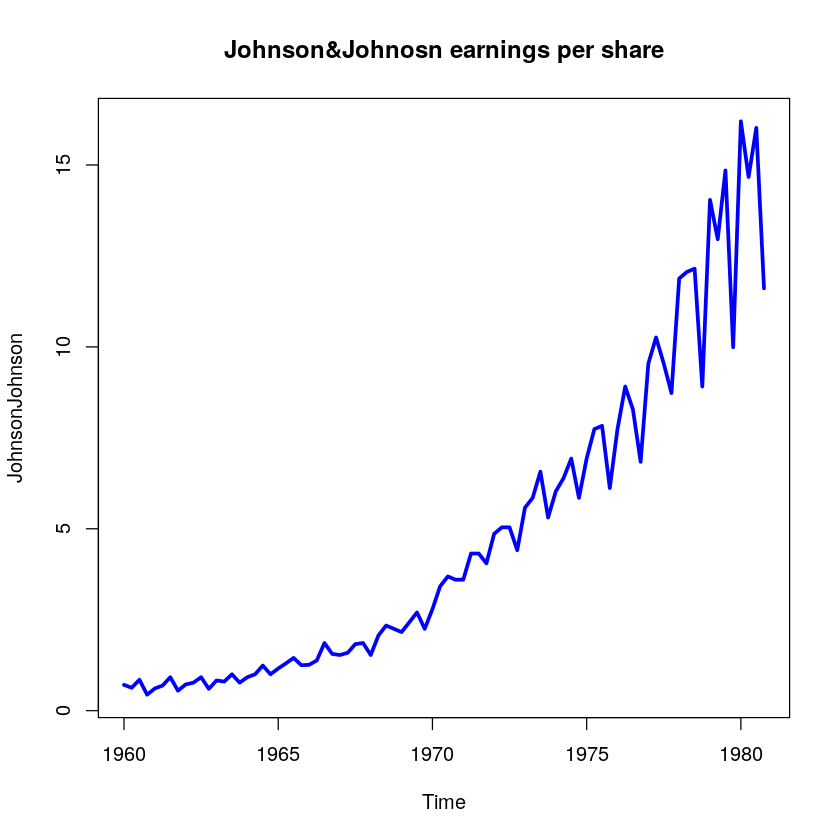

In [18]:
# Time plot for Johnson&Johnson
plot(JohnsonJohnson, main='Johnson&Johnosn earnings per share', col='blue', lwd=3)

In [20]:
write.table(JohnsonJohnson, file = "johnson.csv", sep=',', row.names=F)

In [15]:
print(JohnsonJohnson)

      Qtr1  Qtr2  Qtr3  Qtr4
1960  0.71  0.63  0.85  0.44
1961  0.61  0.69  0.92  0.55
1962  0.72  0.77  0.92  0.60
1963  0.83  0.80  1.00  0.77
1964  0.92  1.00  1.24  1.00
1965  1.16  1.30  1.45  1.25
1966  1.26  1.38  1.86  1.56
1967  1.53  1.59  1.83  1.86
1968  1.53  2.07  2.34  2.25
1969  2.16  2.43  2.70  2.25
1970  2.79  3.42  3.69  3.60
1971  3.60  4.32  4.32  4.05
1972  4.86  5.04  5.04  4.41
1973  5.58  5.85  6.57  5.31
1974  6.03  6.39  6.93  5.85
1975  6.93  7.74  7.83  6.12
1976  7.74  8.91  8.28  6.84
1977  9.54 10.26  9.54  8.73
1978 11.88 12.06 12.15  8.91
1979 14.04 12.96 14.85  9.99
1980 16.20 14.67 16.02 11.61


In [3]:
# log-return of Johnson&Johnson
jj.log.return=diff(log(JohnsonJohnson))
jj.log.return.mean.zero=jj.log.return-mean(jj.log.return)

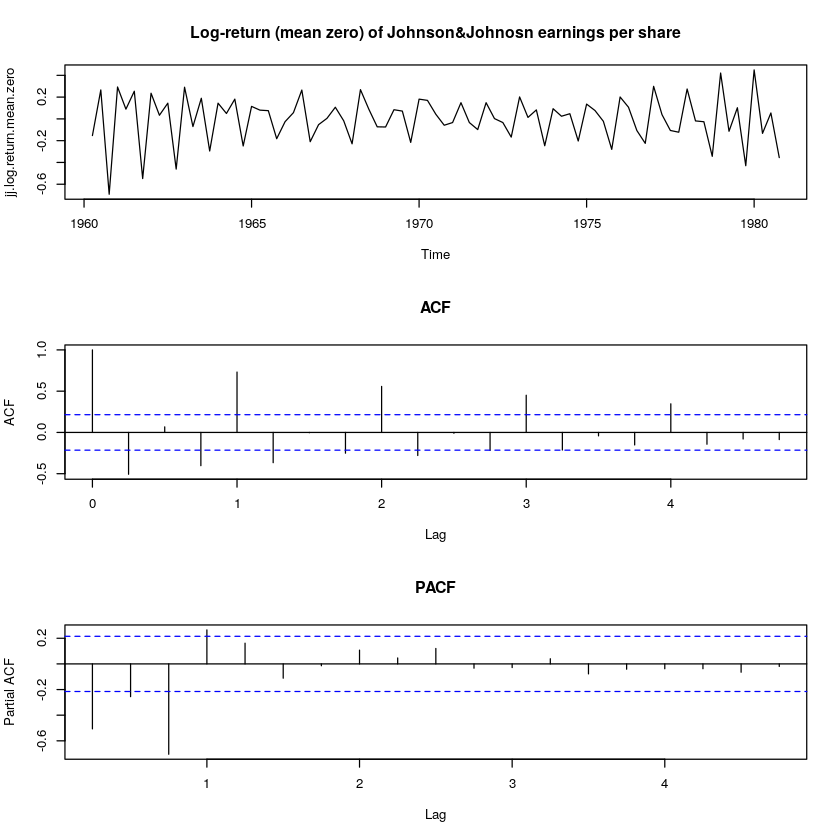

In [4]:
# Plots for log-returns
par(mfrow=c(3,1))
plot(jj.log.return.mean.zero, main='Log-return (mean zero) of Johnson&Johnosn earnings per share')
acf(jj.log.return.mean.zero, main='ACF')
pacf(jj.log.return.mean.zero, main='PACF')

In [5]:
# Order
p=4

In [6]:
# sample autocorreleation function r
r=NULL
r[1:p]=acf(jj.log.return.mean.zero, plot=F)$acf[2:(p+1)]
r

[1] -0.50681760  0.06710084 -0.40283604  0.73144780

In [7]:
# matrix R
R=matrix(1,p,p) # matrix of dimension 4 by 4, with entries all 1's.

# define non-diagonal entires of R
for(i in 1:p){
	for(j in 1:p){
		if(i!=j)
			R[i,j]=r[abs(i-j)]
		}
	}
R

1.00000000,-0.50681760,0.06710084,-0.40283604
-0.50681760,1.00000000,-0.50681760,0.06710084
0.06710084,-0.50681760,1.00000000,-0.50681760
-0.40283604,0.06710084,-0.50681760,1.00000000


In [8]:
# b-column vector on the right
b=matrix(r,p,1)# b- column vector with no entries
b

-0.50681760
0.06710084
-0.40283604
0.73144780


In [9]:
phi.hat=solve(R,b)[,1]
phi.hat

[1] -0.6293492 -0.5171526 -0.4883374  0.2651266

In [10]:
# Variance estimation using Yule-Walker Estimator
c0=acf(jj.log.return.mean.zero, type='covariance', plot=F)$acf[1]
c0
var.hat=c0*(1-sum(phi.hat*r))
var.hat

[1] 0.04365692

[1] 0.01419242

In [11]:
# Constant term in the model
phi0.hat=mean(jj.log.return)*(1-sum(phi.hat))
phi0.hat

[1] 0.079781

In [12]:
cat("Constant:", phi0.hat," Coeffcinets:", phi.hat, " and Variance:", var.hat, '\n')

Constant: 0.079781  Coeffcinets: -0.6293492 -0.5171526 -0.4883374 0.2651266  and Variance: 0.01419242 
